In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d #for 3d plotting
%matplotlib inline

In [12]:
df = pd.read_csv(r'C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_02/Mall_Customers.csv')
print (df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print (df_encoded)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0             1   19                  15                      39         True
1             2   21                  15                      81         True
2             3   20                  16                       6        False
3             4   23                  16                      77        False
4             5   31                  17                      40        False
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79        False
196         197   45                 126                      28        False
197         198   32                 126                      74         True
198         199   32                 137                      18         True
199         200   30                 137                      83         True

[200 rows x 5 columns]


In [16]:
correlation = df_encoded.corr()
print(correlation)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Gender_Male               0.057400  0.060867            0.056410   

                        Spending Score (1-100)  Gender_Male  
CustomerID                            0.013835     0.057400  
Age                                  -0.327227     0.060867  
Annual Income (k$)                    0.009903     0.056410  
Spending Score (1-100)                1.000000    -0.058109  
Gender_Male                          -0.058109     1.000000  


Text(0, 0.5, 'Count')

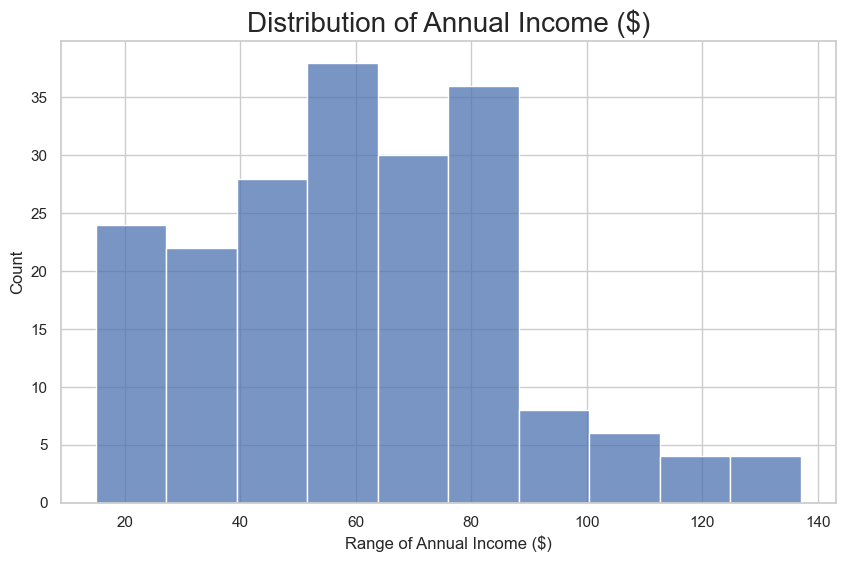

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income ($)', fontsize = 20)
plt.xlabel('Range of Annual Income ($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

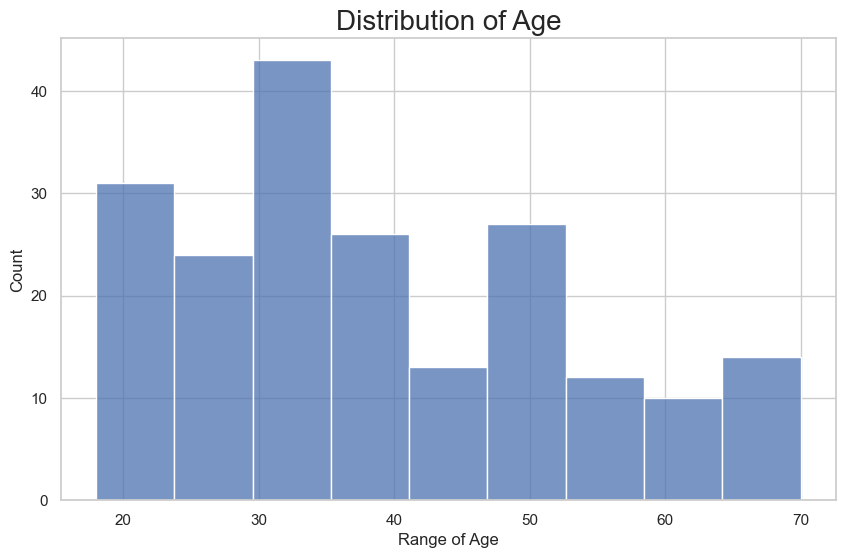

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

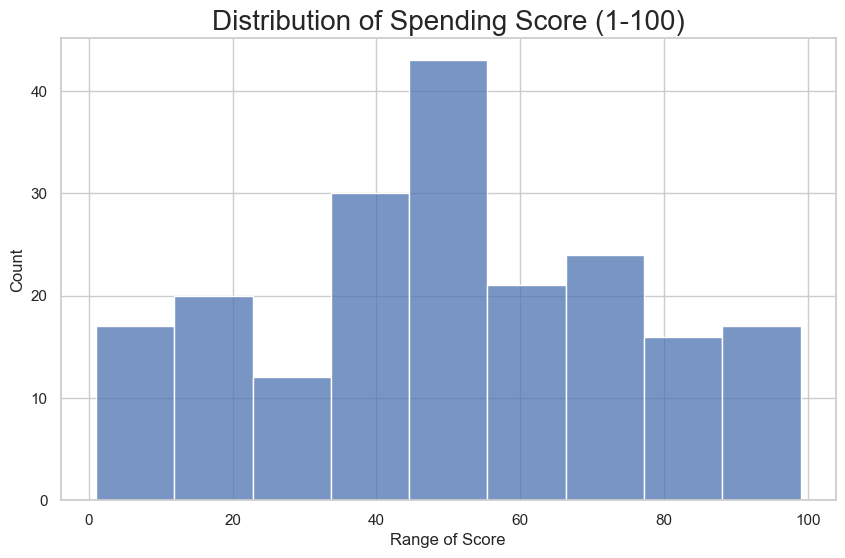

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Score')
plt.ylabel('Count')

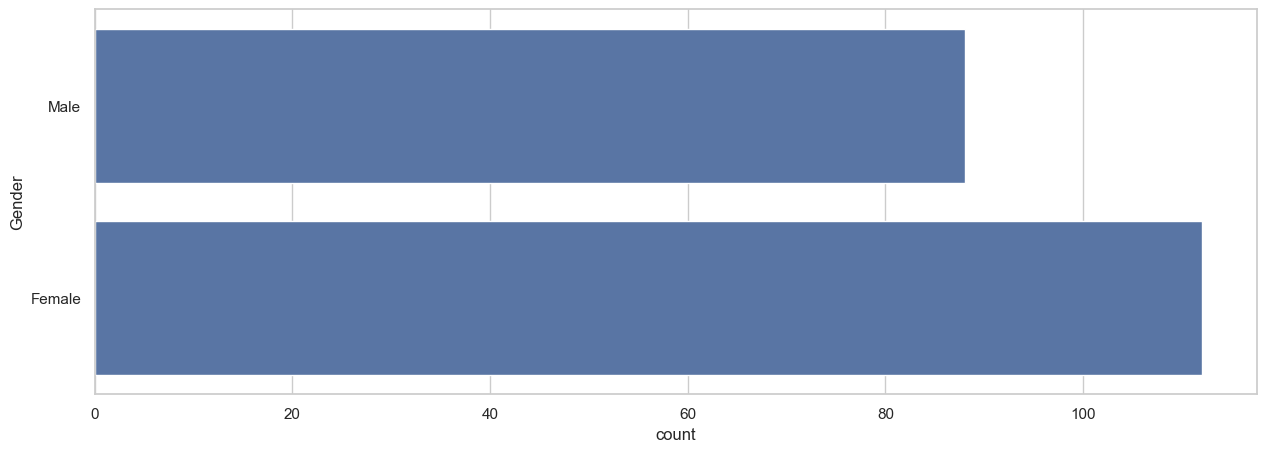

In [25]:
plt.figure(1, figsize= (15,5))
sns.countplot(y = 'Gender', data= df)
plt.show()

In [29]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

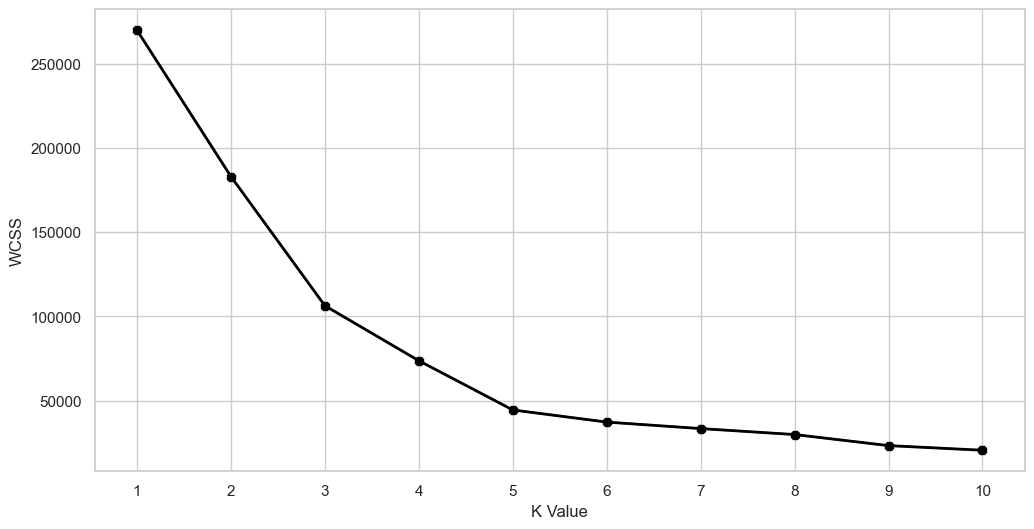

In [31]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="black", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

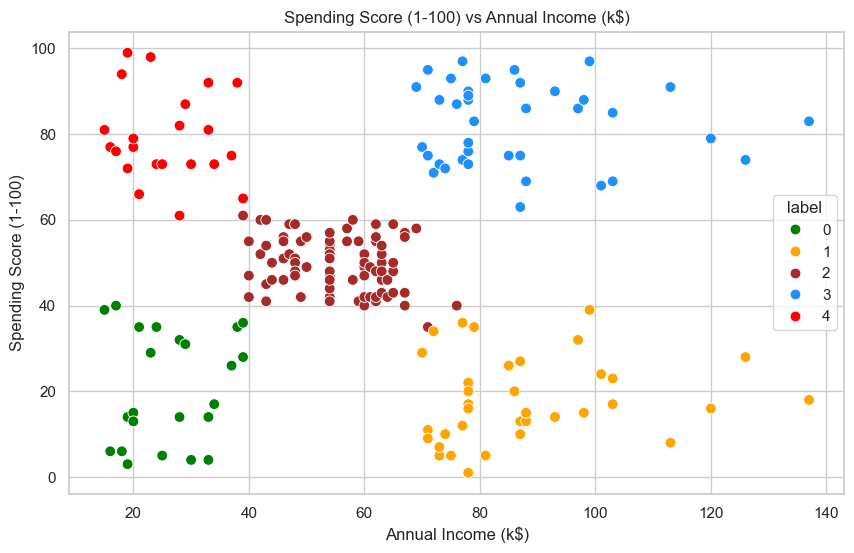

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
df1['label'] = kmeans.fit_predict(df1[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='label',  # Now use the 'label' column
    palette=['green', 'orange', 'brown', 'dodgerblue', 'red'],
    legend='full',
    data=df1,
    s=60
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()
